In [1]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import numpy as np
%matplotlib inline

In [2]:
tf.disable_eager_execution()

In [3]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder('float', name='X')
Y = tf.placeholder('float', name='Y')
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

W0209 22:38:13.821676 4534164928 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
yp = tf.add(tf.multiply(X, W), b, name='yp')

In [6]:
cost = tf.reduce_sum(tf.pow(yp-Y, 2.))/(2*n_samples)

In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [8]:
init = tf.global_variables_initializer()

In [9]:
saver = tf.train.Saver()

In [10]:
sess = tf.Session()

Epoch: 0050 cost= 0.307716548 W= 0.51807547 b= -1.1299721
Epoch: 0100 cost= 0.281065434 W= 0.5021074 b= -1.0150996
Epoch: 0150 cost= 0.257491589 W= 0.48708913 b= -0.9070596
Epoch: 0200 cost= 0.236639887 W= 0.47296423 b= -0.805446
Epoch: 0250 cost= 0.218195811 W= 0.45967928 b= -0.7098753
Epoch: 0300 cost= 0.201881453 W= 0.44718453 b= -0.6199887
Epoch: 0350 cost= 0.187451065 W= 0.43543288 b= -0.53544825
Epoch: 0400 cost= 0.174687073 W= 0.42438006 b= -0.45593533
Epoch: 0450 cost= 0.163397044 W= 0.41398472 b= -0.38115147
Epoch: 0500 cost= 0.153411046 W= 0.40420765 b= -0.31081584
Epoch: 0550 cost= 0.144578308 W= 0.395012 b= -0.24466313
Epoch: 0600 cost= 0.136765748 W= 0.3863633 b= -0.18244487
Epoch: 0650 cost= 0.129855588 W= 0.37822896 b= -0.12392718
Epoch: 0700 cost= 0.123743601 W= 0.3705784 b= -0.06888957
Epoch: 0750 cost= 0.118337646 W= 0.36338285 b= -0.017125312
Epoch: 0800 cost= 0.113556206 W= 0.35661528 b= 0.031560194
Epoch: 0850 cost= 0.109327182 W= 0.35025015 b= 0.07735019
Epoch: 09

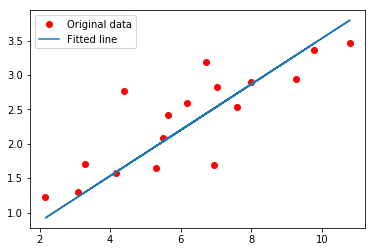

In [11]:
display_step = 50

sess.run(init)

# Fit all training data
for epoch in range(1000):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))

saver.save(sess, 'linear_regression_models/lr')
        
print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [13]:
sess.run(yp, feed_dict={X: 2.5})

1.0323622

In [14]:
sess.run(yp, feed_dict={X: 1.3})

0.63235724

In [15]:
sess.run(yp, feed_dict={X: -2.5})

-0.6343251